<a href="https://colab.research.google.com/github/GandaKen/myprojects/blob/master/Spambase%20Classification%20using%20Naive%20Bayes%20and%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB 

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import urllib.request



In [ ]:
#import the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
#raw_data = urllib.request.urlopen(url)
raw_data = urllib.request.urlopen(url, data=None, cafile=None, capath=None, cadefault=False, context=None)

dataset = np.loadtxt(raw_data, delimiter= ',')
data = pd.DataFrame(dataset)

In [ ]:
# Add column names
data.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'spam']


In [ ]:
#Print the first 5 rows of the data
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0


# **Exploratory Data Analysis (EDA)**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
#Get the Summary statistics
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [ ]:
#Drop  Non Words/Char Frequency Columns
data = data.drop(columns = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total'])

In [ ]:
#Create SPAM and HAM
#nominal {0,1} class attribute of type spam denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

SPAM = data[data['spam']==1]
HAM = data[data['spam']==0]

#Total Sum of SPAM messages
sum_spam = SPAM.value_counts().sum()

#Total Sum of HAM Messages
sum_ham = HAM.value_counts().sum()

print("Total Count of SPAM messages = ", sum_spam)
print()
print("Total Count of HAM messages =  ", sum_ham)

Total Count of SPAM messages =  1813

Total Count of HAM messages =   2788


<bound method Figure.show of <Figure size 720x360 with 1 Axes>>

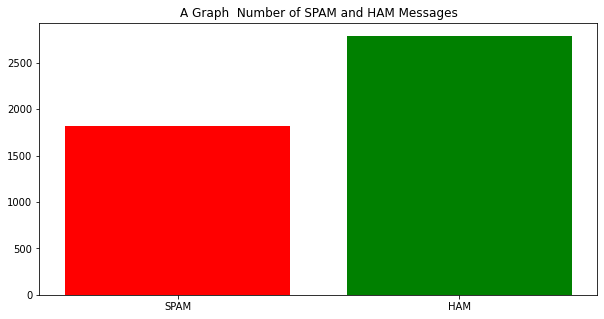

In [ ]:
#Plot a Graph of SPAM and HAM
ham_spam = {'SPAM': 1813, 'HAM':2788}
names = list(ham_spam.keys())
values = list(ham_spam.values())

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(names, values, color= ["red", "green"])
ax.set_title('A Graph  Number of SPAM and HAM Messages')

fig.show

In [ ]:
# Drop the the column with the attribute spam
HAM = HAM.drop(columns = ['spam'])
SPAM = SPAM.drop(columns = ['spam'])

In [ ]:
#Correlation Matrix of is_spam feature
corr_matrix = data.corr()
corr = corr_matrix['spam'].sort_values(ascending = False)
corr

spam                    1.000000
word_freq_your          0.383234
word_freq_000           0.334787
word_freq_remove        0.332117
char_freq_$             0.323629
word_freq_you           0.273651
word_freq_free          0.263215
word_freq_business      0.263204
word_freq_our           0.241920
char_freq_!             0.241888
word_freq_receive       0.234529
word_freq_over          0.232604
word_freq_order         0.231551
word_freq_money         0.216111
word_freq_internet      0.206808
word_freq_email         0.204208
word_freq_all           0.196988
word_freq_addresses     0.195902
word_freq_credit        0.189761
word_freq_mail          0.138962
word_freq_people        0.132927
word_freq_make          0.126208
word_freq_font          0.091860
char_freq_#             0.065067
word_freq_report        0.060027
word_freq_3d            0.057371
word_freq_will          0.007741
word_freq_address      -0.030224
word_freq_parts        -0.031035
word_freq_table        -0.044679
char_freq_

In [ ]:
#Overview of the data
all = HAM.shape[0] + SPAM.shape[0]
HAM_percentage = HAM.shape[0] * 100 / all
SPAM_percentage = SPAM.shape[0] * 100 / all

print('    Data overview\n ')
#print()
print ("HAM data size: ", HAM.shape)
print ("SPAM data size:", SPAM.shape)
print()
print("HAM percentage: ", HAM_percentage)
print("SPAM percentage: ", SPAM_percentage)

    Data overview
 
HAM data size:  (2788, 54)
SPAM data size: (1813, 54)

HAM percentage:  60.595522712453814
SPAM percentage:  39.404477287546186


In [ ]:
#Frequency of Words in SPAM messages
freq_spam = SPAM.select_dtypes(pd.np.number).sum().rename('total')
print('Frequency of words and chars in the spam messages')
sorted_spam = freq_spam.sort_values(ascending=False)
sorted_spam

Frequency of words and chars in the spam messages


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


word_freq_you           4105.610
word_freq_your          2502.610
word_freq_will           997.100
word_freq_free           939.790
word_freq_our            931.800
char_freq_!              931.361
word_freq_all            732.080
word_freq_mail           635.470
word_freq_email          578.760
word_freq_business       521.250
word_freq_remove         499.310
word_freq_000            447.910
word_freq_font           431.560
word_freq_money          385.950
word_freq_internet       377.360
word_freq_credit         372.610
word_freq_over           317.050
char_freq_$              316.329
word_freq_order          308.320
word_freq_3d             298.550
word_freq_address        298.510
word_freq_make           276.190
word_freq_people         260.250
word_freq_re             226.790
word_freq_receive        214.720
word_freq_addresses      203.200
char_freq_(              197.563
word_freq_report         151.520
char_freq_#              143.004
word_freq_1999            78.810
word_freq_

In [ ]:
#Frequency of Words in HAM messages
freq_ham = HAM.select_dtypes(pd.np.number).sum().rename('total')
print('Frequency of words and chars in the spam messages')
sorted_ham = freq_spam.sort_values(ascending=False)
sorted_ham

Frequency of words and chars in the spam messages


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


word_freq_you           4105.610
word_freq_your          2502.610
word_freq_will           997.100
word_freq_free           939.790
word_freq_our            931.800
char_freq_!              931.361
word_freq_all            732.080
word_freq_mail           635.470
word_freq_email          578.760
word_freq_business       521.250
word_freq_remove         499.310
word_freq_000            447.910
word_freq_font           431.560
word_freq_money          385.950
word_freq_internet       377.360
word_freq_credit         372.610
word_freq_over           317.050
char_freq_$              316.329
word_freq_order          308.320
word_freq_3d             298.550
word_freq_address        298.510
word_freq_make           276.190
word_freq_people         260.250
word_freq_re             226.790
word_freq_receive        214.720
word_freq_addresses      203.200
char_freq_(              197.563
word_freq_report         151.520
char_freq_#              143.004
word_freq_1999            78.810
word_freq_

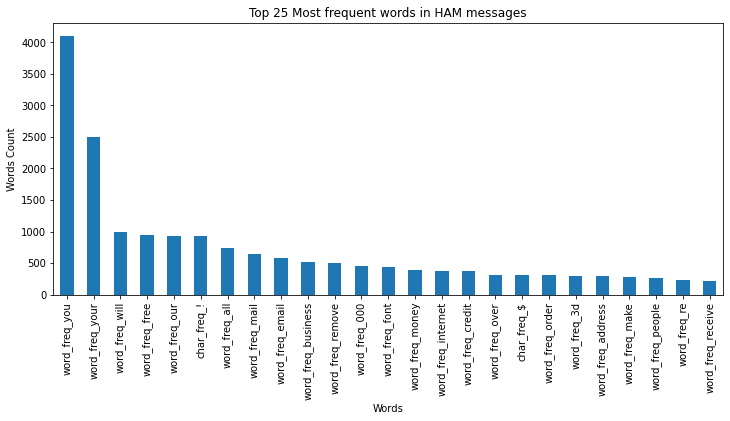

In [ ]:
# Bar graph of the top 25 most frequent words in ham (non-spam)messages
sorted_ham[:25].plot.bar(legend = False, figsize = (12,5))
plt.title('Top 25 Most frequent words in HAM messages')
plt.xlabel('Words')
plt.ylabel('Words Count')
plt.show()


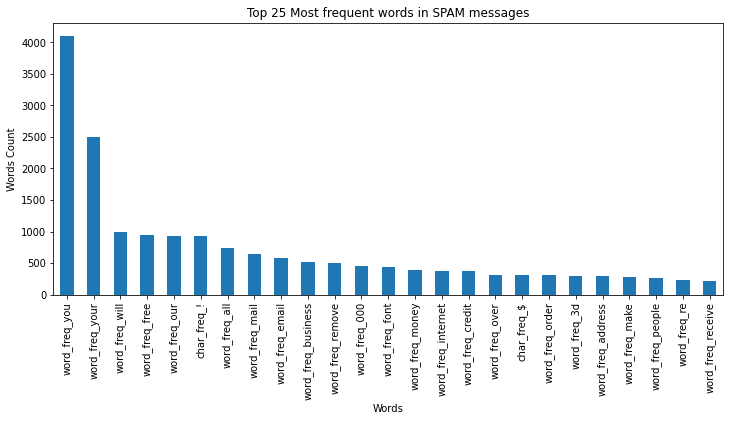

In [ ]:
# Bar graph of the top 25 most frequent words in spam messages
sorted_spam[:25].plot.bar(legend = False, figsize = (12,5))
plt.title('Top 25 Most frequent words in SPAM messages')
plt.xlabel('Words')
plt.ylabel('Words Count')
plt.show()

In [ ]:
#Drop word_freq_you, since its most frequent in both SPAM and HAM messages
data.drop(columns = ['word_freq_you'])

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,0.0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,0.0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,0.0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,0.0


In [ ]:
# Calculate the ratio of words in each ham email
ham_ratio = freq_ham / HAM.shape[0]

# Calculate the ratio of words in each spam email
spam_ratio = freq_spam / HAM.shape[0]


In [ ]:
#Calculate the ratio difference of the words 
diff_ratio = spam_ratio - ham_ratio
diff_ratio

word_freq_make          0.025585
word_freq_address      -0.137396
word_freq_all           0.062001
word_freq_3d            0.106198
word_freq_our           0.153178
word_freq_over          0.069175
word_freq_remove        0.169709
word_freq_internet      0.096937
word_freq_order         0.072539
word_freq_mail          0.060760
word_freq_receive       0.055305
word_freq_will         -0.178684
word_freq_people        0.031682
word_freq_report        0.011944
word_freq_addresses     0.064566
word_freq_free          0.263497
word_freq_business      0.138615
word_freq_email         0.110298
word_freq_you           0.202260
word_freq_credit        0.126069
word_freq_your          0.458935
word_freq_font          0.109566
word_freq_000           0.153569
word_freq_money         0.121295
word_freq_hp           -0.884107
word_freq_hpl          -0.426029
word_freq_george       -1.264258
word_freq_650          -0.181582
word_freq_lab          -0.162349
word_freq_labs         -0.161973
word_freq_

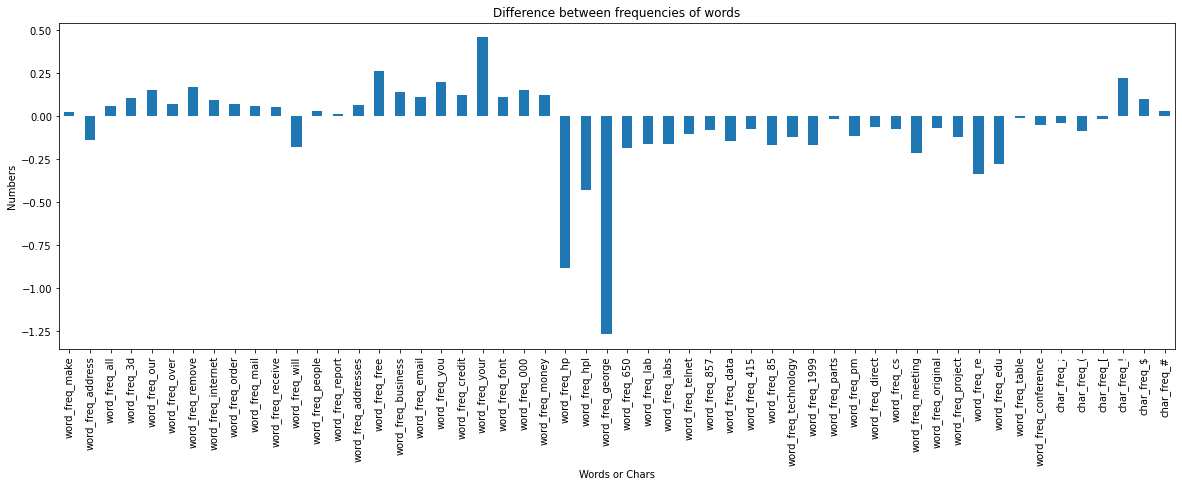

In [ ]:
diff_ratio.plot.bar(legend = False, figsize = (20,6))
plt.title('Difference between frequencies of words')
plt.xlabel('Words or Chars')
plt.ylabel('Numbers')
plt.show()

In [ ]:
#Calculate the length of words in SPAM emails

spam_len = SPAM.select_dtypes(pd.np.number).sum().rename('total')
spam_len_ratio = spam_len / SPAM.shape[0]
print('Rate of the types of length in the spam email')
print()
print(spam_len_ratio)

Rate of the types of length in the spam email

word_freq_make          0.152339
word_freq_address       0.164650
word_freq_all           0.403795
word_freq_3d            0.164672
word_freq_our           0.513955
word_freq_over          0.174876
word_freq_remove        0.275405
word_freq_internet      0.208141
word_freq_order         0.170061
word_freq_mail          0.350507
word_freq_receive       0.118434
word_freq_will          0.549972
word_freq_people        0.143547
word_freq_report        0.083574
word_freq_addresses     0.112079
word_freq_free          0.518362
word_freq_business      0.287507
word_freq_email         0.319228
word_freq_you           2.264539
word_freq_credit        0.205521
word_freq_your          1.380370
word_freq_font          0.238036
word_freq_000           0.247055
word_freq_money         0.212879
word_freq_hp            0.017479
word_freq_hpl           0.009173
word_freq_george        0.001550
word_freq_650           0.018798
word_freq_lab           0.000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Spliting the data in target(Y) and features(X)
y = data['spam']
X = data.drop(columns = ['spam'])


In [ ]:
#Spliting the data in train output, train inputs, test output and test inputs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X_train Shape :" ,  X_train.shape, '\n')
print("X_test Shape  :" ,  X_test.shape, '\n')
print("y_train Shape :" ,  y_train.shape, '\n')
print("y_test Shape :" ,  y_test.shape, '\n')

X_train Shape : (3220, 54) 

X_test Shape  : (1381, 54) 

y_train Shape : (3220,) 

y_test Shape : (1381,) 



### **Naive Bayes**

In [ ]:
#Multinomial Naive Bayes
y_true = y_test

multNB = MultinomialNB()
multNB.fit(X_train, y_train)

y_pred = multNB.predict(X_test)
print("Predictions :", y_pred, '\n')
print("Multinomial Accuracy_score : ", accuracy_score(y_true, y_pred))

Predictions : [0. 0. 0. ... 1. 1. 0.] 

Multinomial Accuracy_score :  0.8826937002172339


In [ ]:
#Gaussian Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train)

#Predicting with Naive Bayes classifier

y_pred = gnb.predict(X_test)
print("Predictions :", y_pred, '\n')
print("Gaussian Accuracy_score : ", accuracy_score(y_true, y_pred))

Predictions : [1. 0. 0. ... 1. 1. 0.] 

Gaussian Accuracy_score :  0.8167994207096307


In [ ]:
#Predict Using Bernoulli Naive Bayes
BernNB = BernoulliNB(binarize= 0.1) 
BernNB.fit(X_train, y_train)

y_pred = BernNB.predict(X_test)
print("Predictions :", y_pred, '\n')
print("Bernoulli Accuracy_score : ", accuracy_score(y_true, y_pred))

Predictions : [0. 0. 0. ... 1. 1. 0.] 

Bernoulli Accuracy_score :  0.9000724112961622


In [ ]:
from sklearn import metrics
print('            Confusion Matrix     ')
conf_matrix = metrics.confusion_matrix(y_true, y_pred)
pd.DataFrame(conf_matrix, columns = ['Predicted ham', 'Predicted Spam'], index = ['Actual Ham', 'Actual Spam'])

            Confusion Matrix     


,Predicted ham,Predicted Spam
Actual Ham,755,49
Actual Spam,89,488


In [ ]:
#Calculate recall, precision and specificity

TP = conf_matrix[0][0] #True Positive
TN = conf_matrix[1][1] # True Negative
FP = conf_matrix[1][0] #False Positive
FN = conf_matrix[0][1] #False Negative

recall = TP / (TP + FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)

print("recall = ", recall)
print("precision = ", precision)
print("specifity = ", specificity)

recall =  0.9390547263681592
precision =  0.8945497630331753
specifity =  0.8457538994800693


In [ ]:
#Calculate Precision and Recall score
from sklearn.metrics import precision_score, recall_score
print("Precisio_score is :",  precision_score(y_true, y_pred), '\n' )

print("recall_score is :", recall_score(y_true, y_pred))

Precisio_score is : 0.9087523277467412 

recall_score is : 0.8457538994800693


In [ ]:
#Using 10 fold cross validation
results = cross_val_score(BernNB, X, y, cv=10, scoring='accuracy') 

print("Bernoulli Naive Bayes 10 Fold Cross validation values: ", results, '\n')

print("Mean of Values = ", np.mean(results)) 


Bernoulli Naive Bayes 10 Fold Cross validation values:  [0.89804772 0.9326087  0.90869565 0.9173913  0.91956522 0.94565217
 0.94130435 0.91304348 0.82173913 0.80434783] 

Mean of Values =  0.9002395548429689


Text(0.5, 0, 'False Positive Rate')

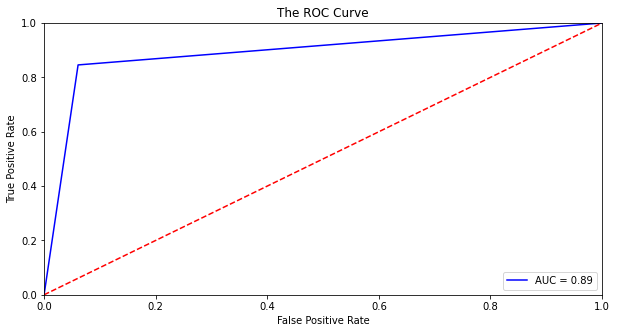

In [ ]:
#Plot the ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_expected, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize= (10,5))
plt.title('The ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# **Logistic Regression**

In [ ]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear', penalty='l1')
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Predictions :", y_pred, '\n')
print("Logistic Regression Accuracy_score : ", accuracy_score(y_expect, y_pred))

Predictions : [0. 0. 0. ... 1. 1. 0.] 

Logistic Regression Accuracy_score :  0.9246922519913107


In [ ]:
#Using 10 fold cross validation
results = cross_val_score(clf, X, y, cv=10, scoring='accuracy') 

print("Logistic Regression 10 Fold Cross validation values: ", results, '\n')

print("Mean of Values = ", np.mean(results)) 


Logistic Regression 10 Fold Cross validation values:  [0.92190889 0.93043478 0.91304348 0.93043478 0.86086957 0.92173913
 0.95217391 0.9326087  0.84347826 0.87173913] 

Mean of Values =  0.9078430632839762
